In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [54]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
account = pd.read_csv('../data/raw/account_services.csv')
billing = pd.read_csv('../data/raw/billing_records.csv')
churn_label = pd.read_csv('../data/raw/churn_labels.csv')
customer = pd.read_csv('../data/raw/customer_info.csv')
ticket = pd.read_csv('../data/raw/support_tickets.csv')
data = pd.read_csv('../data/raw/usage_data.csv')

Intial Data Exploration

In [28]:
account.head()

,customer_id,plan_type,contract_length,num_add_ons,auto_renewal
0,CUST0000001,premium,12.0,5,False
1,CUST0000002,business,0.0,5,False
2,CUST0000003,basic,12.0,2,False
3,CUST0000004,premium,12.0,5,False
4,CUST0000005,business,24.0,0,True


In [29]:
billing.head()

,customer_id,billing_month,amount_due,payment_date,payment_method
0,CUST0000001,2024-01-01,88.801399,2023-12-29,cach
1,CUST0000002,2024-03-01,82.576134,2024-03-01,cach
2,CUST0000003,2024-04-01,46.676587,2024-04-07,credit_card
3,CUST0000004,2024-02-01,108.109422,2024-01-30,cach
4,CUST0000005,2024-04-01,99.362138,2024-04-04,credit_card


In [30]:
churn_label.head()

,customer_id,churn_flag,churn_date
0,CUST0000001,0,NaN
1,CUST0000002,0,NaN
2,CUST0000003,0,NaN
3,CUST0000004,0,NaN
4,CUST0000005,0,NaN


In [31]:
customer.head()

,customer_id,gender,age,join_date,region,tenure_months
0,CUST0000001,Male,66,2018-02-09,north_east,131
1,CUST0000002,Female,72,2019-09-26,north_east,101
2,CUST0000003,Female,30,2023-11-22,mid_west,80
3,CUST0000004,Female,40,2021-04-16,mid_west,12
4,CUST0000005,Male,89,2024-12-10,south_east,127


In [32]:
ticket.head()

,ticket_id,customer_id,ticket_date,issue_category,resolution_time_hr
0,TICKET4575903,CUST0332715,2025-02-15,billing,14.322078
1,TICKET1794351,CUST0388310,2025-04-28,billing,2.151395
2,TICKET7570900,CUST0192056,2023-03-21,billing,89.216149
3,TICKET9971474,CUST0357392,2025-04-26,billing,8.345784
4,TICKET7143337,CUST0256892,2025-09-07,tech_support,14.915088


In [33]:
data.head()

,customer_id,month,call_minutes,data_mb,sms_count
0,CUST0000001,2024-01-01,504.246919,1271.721299,42
1,CUST0000001,2024-02-01,489.220910,2.225688,25
2,CUST0000001,2024-03-01,351.915656,206.345185,27
3,CUST0000001,2024-04-01,82.943151,407.355100,28
4,CUST0000002,2024-01-01,223.750247,499.113801,36


Merge datasets

In [34]:
# Merge datasets on 'customer_id'
merged_df = customer.merge(account, on='customer_id', how='left') \
                      .merge(billing, on='customer_id', how='left') \
                      .merge(churn_label, on='customer_id', how='left') \
                      .merge(ticket, on='customer_id', how='left') \
                      .merge(data, on='customer_id', how='left')

# Display the merged dataset
merged_df.head()

,customer_id,gender,age,join_date,region,tenure_months,plan_type,contract_length,num_add_ons,auto_renewal,...,churn_flag,churn_date,ticket_id,ticket_date,issue_category,resolution_time_hr,month,call_minutes,data_mb,sms_count
0,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.0,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-01-01,504.246919,1271.721299,42
1,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.0,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-02-01,489.220910,2.225688,25
2,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.0,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-03-01,351.915656,206.345185,27
3,CUST0000001,Male,66,2018-02-09,north_east,131,premium,12.0,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-04-01,82.943151,407.355100,28
4,CUST0000002,Female,72,2019-09-26,north_east,101,business,0.0,5,False,...,0,NaN,NaN,NaN,NaN,NaN,2024-01-01,223.750247,499.113801,36


In [37]:
merged_df.shape

(2337872, 24)

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337872 entries, 0 to 2337871
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   gender              object 
 2   age                 int64  
 3   join_date           object 
 4   region              object 
 5   tenure_months       int64  
 6   plan_type           object 
 7   contract_length     float64
 8   num_add_ons         int64  
 9   auto_renewal        object 
 10  billing_month       object 
 11  amount_due          float64
 12  payment_date        object 
 13  payment_method      object 
 14  churn_flag          int64  
 15  churn_date          object 
 16  ticket_id           object 
 17  ticket_date         object 
 18  issue_category      object 
 19  resolution_time_hr  float64
 20  month               object 
 21  call_minutes        float64
 22  data_mb             float64
 23  sms_count           object 
dtypes: float64(5), int64(4),

In [45]:
missing = merged_df.isna().sum() / len(merged_df) * 100
missing_df = pd.DataFrame({'column': missing.index, 'missing_percentage': missing.values}).round(2)
missing_df = missing_df[missing_df['missing_percentage'] > 0].sort_values(by='missing_percentage', ascending=False).reset_index(drop=True)
missing_df

,column,missing_percentage
0,churn_date,98.03
1,issue_category,50.20
2,ticket_id,47.61
3,ticket_date,47.61
4,resolution_time_hr,47.61
5,auto_renewal,5.02
6,contract_length,4.97
7,plan_type,4.96
8,join_date,2.01
9,billing_month,1.00


In [62]:
# Count of unique values for categorical variables
print("\nUnique Values for Categorical Variables:")
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"{col}: {merged_df[col].nunique()} unique values")
    if merged_df[col].nunique() < 10:  # Only show value counts for low-cardinality variables
        print(merged_df[col].value_counts())
        print()


Unique Values for Categorical Variables:
customer_id: 500000 unique values
gender: 3 unique values
gender
Female    1205524
Male      1108972
Fmale       23376
Name: count, dtype: int64

join_date: 3288 unique values
region: 5 unique values
region
south_west    580356
north_east    580280
mid_west      578500
south_east    575556
north_est      23180
Name: count, dtype: int64

plan_type: 3 unique values
plan_type
basic       935484
premium     699568
business    586796
Name: count, dtype: int64

auto_renewal: 2 unique values
auto_renewal
False    1169624
True     1050968
Name: count, dtype: int64

billing_month: 4 unique values
billing_month
2024-01-01    579760
2024-02-01    579060
2024-04-01    578528
2024-03-01    577212
Name: count, dtype: int64

payment_date: 60 unique values
payment_method: 3 unique values
payment_method
credit_card      782584
bank_transfer    778824
cach             776464
Name: count, dtype: int64

churn_date: 3250 unique values
ticket_id: 294926 unique value

In [55]:
merged_df.describe()

,age,tenure_months,contract_length,num_add_ons,amount_due,churn_flag,resolution_time_hr,call_minutes,data_mb
count,2337872.00,2337872.00,2221636.00,2337872.00,2337872.00,2337872.00,1224756.00,2337872.00,2337872.00
mean,58.58,74.49,10.43,1.50,84.40,0.02,24.00,329.51,3489.00
std,23.88,43.35,8.58,2.29,38.71,0.14,23.98,1043.62,101501.84
min,-5.00,0.00,0.00,-2.00,-100.00,0.00,0.00,0.00,0.00
25%,38.00,37.00,1.00,-1.00,52.11,0.00,6.90,86.39,143.77
50%,59.00,75.00,12.00,1.00,84.85,0.00,16.65,208.36,346.96
75%,79.00,112.00,12.00,4.00,117.40,0.00,33.29,416.74,694.19
max,200.00,149.00,24.00,5.00,150.00,1.00,298.00,49988.50,4999133.14


In [52]:
merged_df.describe(include='O')

,customer_id,gender,join_date,region,plan_type,auto_renewal,billing_month,payment_date,payment_method,churn_date,ticket_id,ticket_date,issue_category,month,sms_count
count,2337872,2337872,2290956,2337872,2221848,2220592,2314560,2337872,2337872,45972,1224756,1224756,1164300,2337872,2337872
unique,500000,3,3288,5,3,2,4,60,3,3250,294926,1097,3,4,60
top,CUST0149520,Female,2019-08-27,south_west,basic,False,2024-01-01,2024-01-31,credit_card,2017-02-04,TICKET7962143,2026-01-01,billing,2024-01-01,29
freq,64,1205524,924,580356,935484,1169624,579760,40008,782584,60,32,12276,606524,584468,168154


Lets investigate these missing columns

<Axes: >

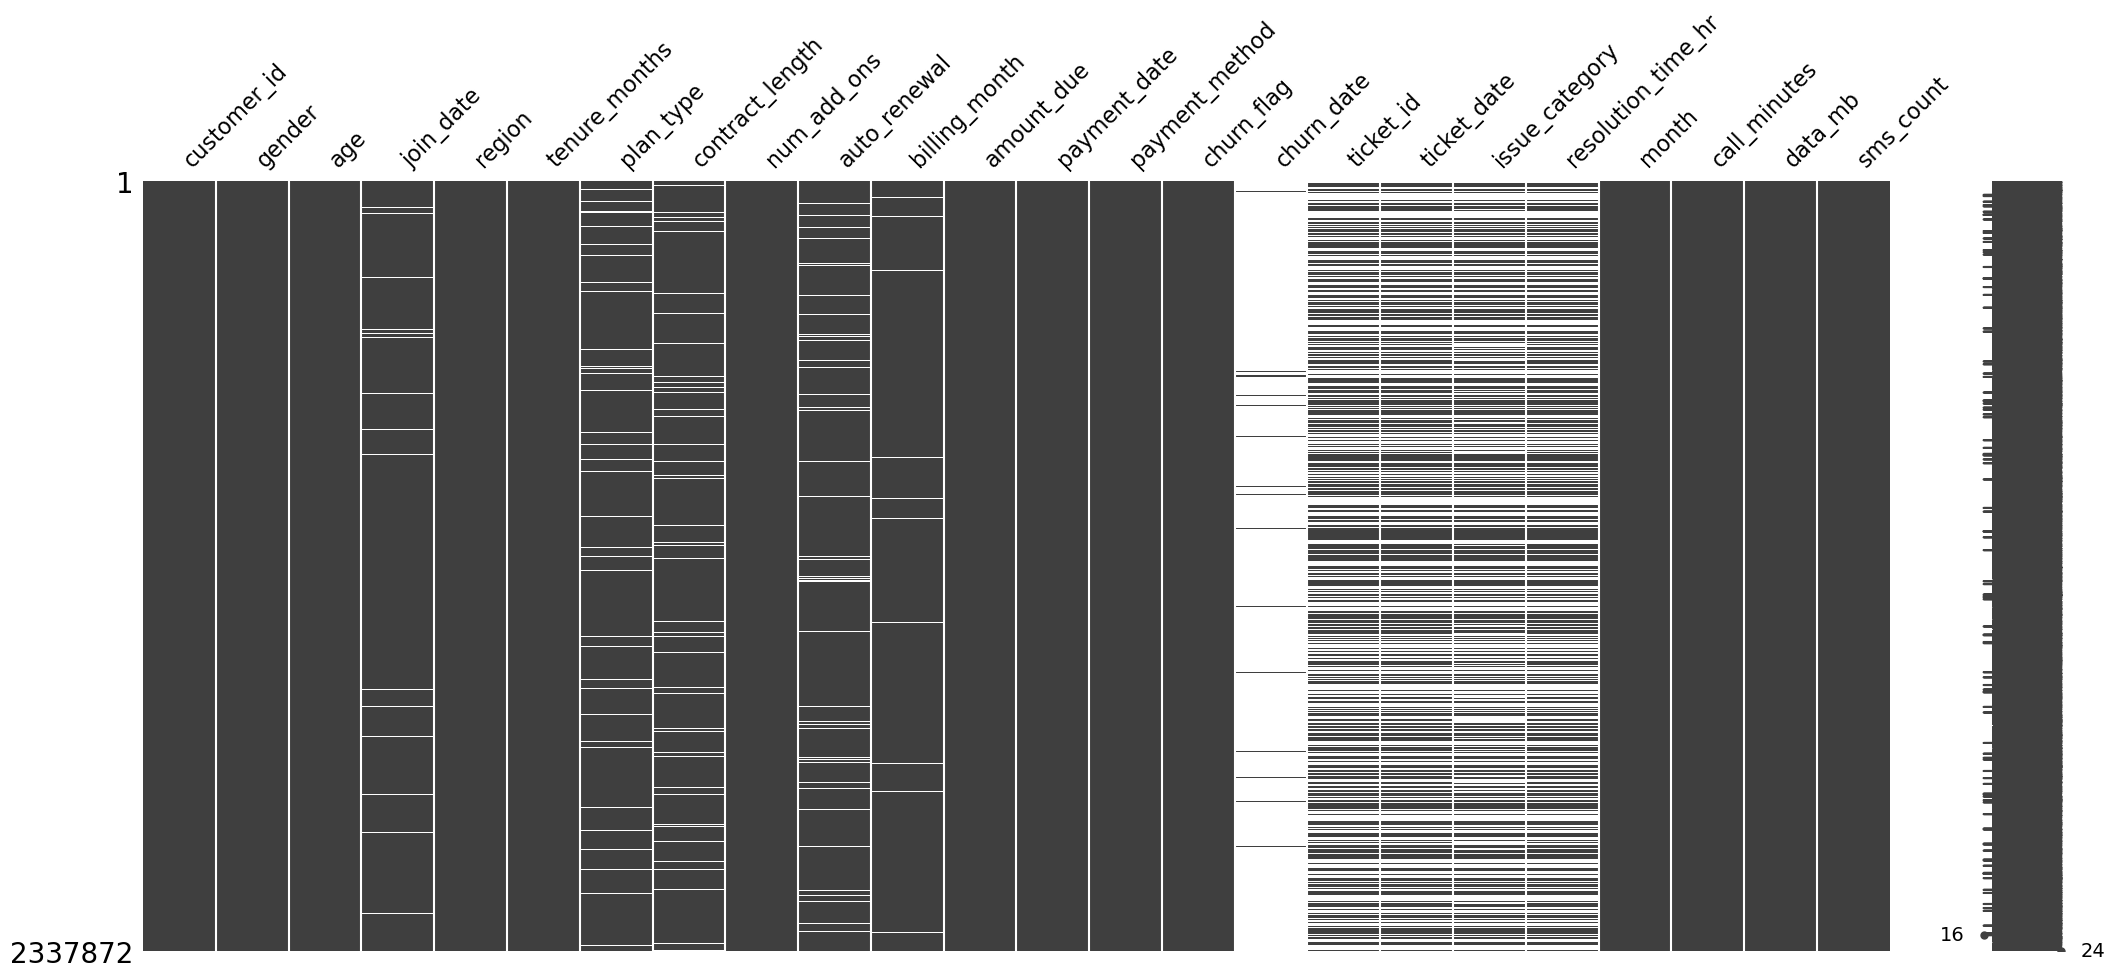

In [ ]:
# Visualize missing values in the merged DataFrame
import missingno as msno
msno.matrix(merged_df)

In [ ]:
### 2.3.1 Distribution of Numerical Variables

# Create histograms for numerical variables
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)

# Determine grid size
if num_cols <= 3:
    nrows, ncols = 1, num_cols
else:
    nrows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)
    ncols = min(3, num_cols)

plt.figure(figsize=(ncols*5, nrows*4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(merged_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.suptitle('Distribution of Numerical Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### 2.3.2 Distribution of Categorical Variables

# Create bar plots for categorical variables
if len(categorical_columns) > 0:
    num_cats = len(categorical_columns)

    # Determine grid size
    if num_cats <= 3:
        nrows, ncols = 1, num_cats
    else:
        nrows = (num_cats // 3) + (1 if num_cats % 3 != 0 else 0)
        ncols = min(3, num_cats)

    plt.figure(figsize=(ncols*5, nrows*4))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(nrows, ncols, i)
        value_counts = merged_df[col].value_counts().sort_values(ascending=False)

        # Limit number of categories shown if there are too many
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            plt.title(f'Top 10 Categories in {col}')
        else:
            plt.title(f'Categories in {col}')

        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Count')
        plt.tight_layout()

    plt.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
### 2.3.3 Correlation Analysis

# Create correlation heatmap for numerical variables
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = merged_df[numerical_columns].corr()
    mask = np.triu(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

    # Identify highly correlated variables
    high_corr_threshold = 0.7
    high_corr_vars = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
                high_corr_vars.add(f"{correlation_matrix.columns[i]} & {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

    if high_corr_vars:
        print("Highly correlated variables (|r| > 0.7):")
        for pair in high_corr_vars:
            print(f"  {pair}")
    else:
        print("No highly correlated variables found (|r| > 0.7)")

In [ ]:
### 2.3.4 Target Variable Analysis (if applicable)

# If this is a supervised learning project with a target variable
if 'churn_flag' in merged_df.columns:  # Replace with your actual target column name
    target_col = 'churn_flag'  # Replace with your actual target column name

    # Check target variable distribution
    plt.figure(figsize=(8, 5))
    if merged_df[target_col].dtype == 'object' or merged_df[target_col].nunique() < 10:
        # Categorical target
        sns.countplot(x=target_col, data=merged_df)
        plt.title(f'Distribution of Target Variable: {target_col}')

        # Calculate and display percentages
        total = len(merged_df[target_col])
        for p in plt.gca().patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')
    else:
        # Numerical target
        sns.histplot(merged_df[target_col], kde=True)
        plt.title(f'Distribution of Target Variable: {target_col}')

    plt.tight_layout()
    plt.show()

    # Relationship between features and target (examples for numerical and categorical features)
    # For numerical features vs. target
    numerical_columns_ex_target = [col for col in numerical_columns if col != target_col]

    if len(numerical_columns_ex_target) > 0:
        sample_num_features = min(3, len(numerical_columns_ex_target))
        plt.figure(figsize=(5*sample_num_features, 4))

        for i, col in enumerate(numerical_columns_ex_target[:sample_num_features], 1):
            plt.subplot(1, sample_num_features, i)

            if merged_df[target_col].dtype == 'object' or merged_df[target_col].nunique() < 10:
                # Categorical target
                sns.boxplot(x=target_col, y=col, data=merged_df)
                plt.title(f'{col} vs {target_col}')
            else:
                # Numerical target
                sns.scatterplot(x=col, y=target_col, data=merged_df)
                plt.title(f'{target_col} vs {col}')

        plt.tight_layout()
        plt.show()

    # For categorical features vs. target
    if len(categorical_columns) > 0:
        sample_cat_features = min(3, len(categorical_columns))

        for col in categorical_columns[:sample_cat_features]:
            plt.figure(figsize=(10, 6))

            if merged_df[target_col].dtype == 'object' or merged_df[target_col].nunique() < 10:
                # Both categorical
                pd.crosstab(merged_df[col], merged_df[target_col], normalize='index').plot(kind='bar', stacked=True)
                plt.title(f'Relationship between {col} and {target_col}')
                plt.xlabel(col)
                plt.ylabel(f'Proportion of {target_col}')
                plt.legend(title=target_col)
            else:
                # Categorical feature, numerical target
                sns.boxplot(x=col, y=target_col, data=merged_df)
                plt.title(f'{target_col} by {col}')

            plt.tight_layout()
            plt.show()


In [ ]:
## 2.4 Data Quality Assessment

### 2.4.1 Missing Values Analysis

# Check for missing values
missing_values = merged_df.isnull().sum()
missing_percentage = (missing_values / len(merged_df)) * 100

missing_data = pd.concat([missing_values, missing_percentage], axis=1,
                         keys=['Missing Values', 'Percentage (%)'])

print("Missing Values Analysis:")
display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Visualize missing values
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    cols_with_missing = missing_data[missing_data['Missing Values'] > 0].index.tolist()

    if len(cols_with_missing) > 0:
        if len(cols_with_missing) <= 30:  # Only visualize if not too many columns
            sns.heatmap(merged_df[cols_with_missing].isnull(), cmap='viridis', yticklabels=False,
                        cbar_kws={'label': 'Missing Values'})
            plt.title('Missing Value Heatmap')
            plt.tight_layout()
            plt.show()

        # Visualize the percentage of missing values by column
        plt.figure(figsize=(12, 6))
        missing_percentage[missing_percentage > 0].sort_values(ascending=False).plot(kind='bar')
        plt.title('Percentage of Missing Values by Column')
        plt.xlabel('Columns')
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No columns with missing values to visualize.")
else:
    print("No missing values in the dataset. Great!")

### 2.4.2 Outliers Detection

# Function to detect outliers in numerical columns
def detect_outliers(merged_df, column):
    q1 = merged_df[column].quantile(0.25)
    q3 = merged_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = merged_df[(merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Detect and visualize outliers in numerical columns
outlier_summary = {}
for col in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers(merged_df, col)
    outlier_percentage = (len(outliers) / len(merged_df)) * 100
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

print("Outlier Analysis:")
for col, stats in outlier_summary.items():
    print(f"{col}: {stats['count']} outliers ({stats['percentage']:.2f}% of data)")
    print(f"  Range: [{stats['lower_bound']:.2f}, {stats['upper_bound']:.2f}]")

# Visualize outliers with box plots for columns with significant outliers
cols_with_outliers = [col for col, stats in outlier_summary.items() if stats['percentage'] > 1]

if cols_with_outliers:
    # Determine grid size
    if len(cols_with_outliers) <= 3:
        nrows, ncols = 1, len(cols_with_outliers)
    else:
        nrows = (len(cols_with_outliers) // 3) + (1 if len(cols_with_outliers) % 3 != 0 else 0)
        ncols = min(3, len(cols_with_outliers))

    plt.figure(figsize=(ncols*5, nrows*4))

    for i, col in enumerate(cols_with_outliers, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(y=merged_df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()

    plt.suptitle('Outlier Analysis with Box Plots', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No columns with significant outliers (>1% of data) found.")

### 2.4.3 Duplicated Rows

# Check for duplicated rows
duplicates = merged_df.duplicated().sum()
duplicate_percentage = (duplicates / len(merged_df)) * 100

print(f"Duplicated Rows: {duplicates} ({duplicate_percentage:.2f}% of data)")


### 2.4.5 Summary of Data Quality Issues

# Summarize all data quality issues
print("\nSummary of Data Quality Issues:")
print(f"- Missing values: {missing_values.sum()} values across {len(missing_data[missing_data['Missing Values'] > 0])} columns")
print(f"- Duplicated rows: {duplicates} rows")

outlier_total = sum(stats['count'] for stats in outlier_summary.values())
print(f"- Outliers: {outlier_total} values across {len(cols_with_outliers)} columns with >1% outliers")

## 2.5 Key Insights from Data Understanding

[In this section, summarize the key insights from your data exploration. This shows your critical thinking and ability to interpret data. Some examples:]

1. **Insight 1**: [Example: The dataset contains 20% missing values in the 'income' column, which will need imputation before modeling.]

2. **Insight 2**: [Example: 'Education' and 'Income' show strong positive correlation (r=0.78), suggesting multicollinearity that should be addressed.]

3. **Insight 3**: [Example: The target variable 'Churn' is imbalanced with only 15% positive cases, which may require specialized modeling approaches.]

4. **Insight 4**: [Example: Customer tenure shows a bimodal distribution, suggesting two distinct customer segments that should be analyzed separately.]

5. **Insight 5**: [Example: Outliers in the 'Transaction_Value' column appear to be valid extreme values rather than errors, as they align with expected VIP customer behavior.]

## 2.6 Data Preparation Strategy

Based on the data understanding phase, the following data preparation tasks will be performed:

1. **Missing Data**: [Approach for handling missing values]
2. **Outliers**: [Strategy for dealing with outliers]
3. **Feature Engineering**: [New features to be created]
4. **Data Transformations**: [Needed normalizations, encodings, etc.]
5. **Feature Selection**: [Approach to selecting relevant features]
6. **Data Splitting Strategy**: [How you'll divide the data]


In [ ]:
# 3. Data Preparation

## 3.1 Data Cleaning

# Make a copy of the original data before modifications
df_original = merged_df.copy()
df_clean = merged_df.copy()

print("Starting data preparation. Original dataset shape:", df_original.shape)

### 3.1.1 Handling Missing Values

# Define strategies for handling missing values
# Example strategies (customize based on your dataset and insights):
# 1. Drop columns with too many missing values
# 2. Drop rows with missing values in critical columns
# 3. Impute missing values

# Strategy 1: Drop columns with high percentage of missing values
high_missing_cols = missing_data[missing_data['Percentage (%)'] > 50].index.tolist()
if high_missing_cols:
    print(f"Dropping columns with >50% missing values: {high_missing_cols}")
    df_clean = df_clean.drop(columns=high_missing_cols)

# Strategy 2: Drop rows with missing values in critical columns
# Identify critical columns where missing values would make the row unusable
# critical_cols = ['id', 'target_variable']  # Customize based on your dataset
# missing_in_critical = df_clean[critical_cols].isnull().any(axis=1)
# if missing_in_critical.sum() > 0:
#     print(f"Dropping {missing_in_critical.sum()} rows with missing values in critical columns")
#     df_clean = df_clean[~missing_in_critical]

# Strategy 3: Impute missing values
# For numerical columns
num_cols_with_missing = [col for col in df_clean.select_dtypes(include=['int64', 'float64']).columns
                         if df_clean[col].isnull().sum() > 0]

for col in num_cols_with_missing:
    # Choose an imputation strategy (median, mean, or constant)
    # Method 1: Median imputation (robust to outliers)
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)
    print(f"Imputed missing values in '{col}' with median: {median_value}")

    # Method 2: Mean imputation
    # mean_value = df_clean[col].mean()
    # df_clean[col].fillna(mean_value, inplace=True)
    # print(f"Imputed missing values in '{col}' with mean: {mean_value}")

    # Method 3: Constant imputation
    # df_clean[col].fillna(0, inplace=True)
    # print(f"Imputed missing values in '{col}' with constant: 0")

# For categorical columns
cat_cols_with_missing = [col for col in df_clean.select_dtypes(include=['object', 'category']).columns
                         if df_clean[col].isnull().sum() > 0]

for col in cat_cols_with_missing:
    # Choose an imputation strategy (mode or constant)
    # Method 1: Mode imputation (most frequent category)
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)
    print(f"Imputed missing values in '{col}' with mode: {mode_value}")

    # Method 2: Constant imputation with a meaningful value like 'Unknown'
    # df_clean[col].fillna('Unknown', inplace=True)
    # print(f"Imputed missing values in '{col}' with constant: 'Unknown'")

# Verify no missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"Remaining missing values after imputation: {remaining_missing}")

### 3.1.2 Handling Duplicates

# Remove duplicate rows if any exist
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

### 3.1.3 Handling Outliers

# Choose an outlier handling strategy based on your analysis
# Example approaches:
# 1. Cap outliers (winsorization)
# 2. Remove outliers
# 3. Transform data to reduce impact of outliers
# 4. Leave outliers as is if they represent valid data points

# Example: Winsorization (capping) for columns with significant outliers
for col in cols_with_outliers:
    # Get the bounds determined earlier
    lower_bound = outlier_summary[col]['lower_bound']
    upper_bound = outlier_summary[col]['upper_bound']

    # Count values outside bounds before capping
    outliers_count = sum((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound))

    # Apply capping
    df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

    print(f"Capped {outliers_count} outliers in '{col}' to range [{lower_bound:.2f}, {upper_bound:.2f}]")

# Verify the shape after cleaning
print(f"\nDataset shape after cleaning: {df_clean.shape}")
print(f"Rows removed: {len(df_original) - len(df_clean)}")
print(f"Columns removed: {len(df_original.columns) - len(df_clean.columns)}")
